In [1]:
import pandas as pd
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/red_wine.csv'
df=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/red_wine.csv')
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [3]:
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


# Split the dataset into features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type'].ravel()

# Create a 10-fold cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a list of models
models = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM-Linear', SVC(kernel='linear')),
    ('SVM-RBF', SVC(kernel='rbf')),
    ('Random Forest', RandomForestClassifier())
]

# Initialize a results list
results = []

# Fit and evaluate each model
for model_name, model in models:
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    # Calculate mean accuracy and AUC
    mean_accuracy = accuracy_scores.mean()
    mean_auc = auc_scores.mean()
    
    # Append results to the list
    results.append((model_name, mean_accuracy, mean_auc))

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'AUC'])

# Print the results in a table format
print(results_df)




                 Model  Accuracy       AUC
0             Baseline  0.528887  0.500000
1  Logistic Regression  0.784392  0.875819
2          Naive Bayes  0.824773  0.893291
3        Decision Tree  0.808923  0.812822
4           SVM-Linear  0.793134  0.875446
5              SVM-RBF  0.535844  0.855024
6        Random Forest  0.856171  0.920253


C:\Users\ramya\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


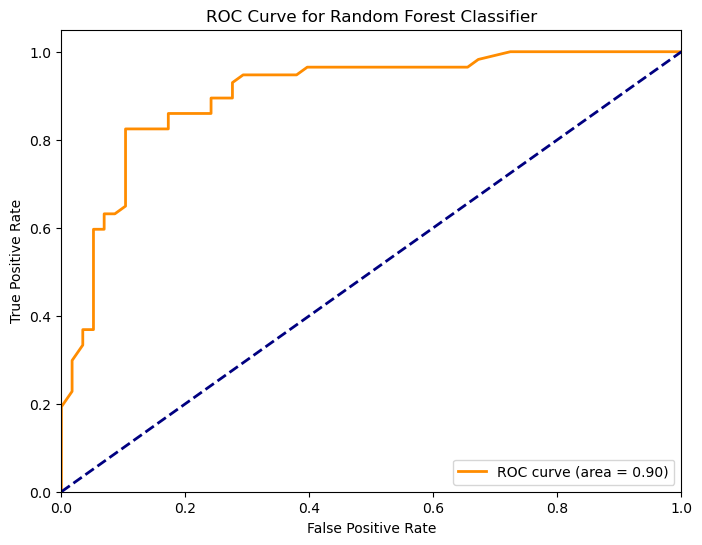

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline
# Split the dataset into features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

# Convert labels to binary format
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class ('high' in this case)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [9]:
file_path= 'C:/Users/ramya/Downloads/white_wine.csv'
df=pd.read_csv('C:/Users/ramya/Downloads/white_wine.csv')
df.head()


,citric acid,sulphates,alcohol,type
0,0.24,0.52,9.4,low
1,0.49,0.56,9.4,low
2,0.66,0.73,10.0,low
3,0.32,0.77,10.0,low
4,0.38,0.82,10.0,low


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score

df['type'] = df['type'].map({'low': 0, 'high': 1})
# Split the dataset into features (X) and the target variable (y)
X = df.drop('type', axis=1)
y = df['type']

rf_classifier = RandomForestClassifier(random_state=42)

# Create a 10-fold cross-validation object
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use cross_val_predict to get probability estimates for the positive class
y_prob = cross_val_predict(rf_classifier, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y, y_prob)

# Get predicted labels for accuracy
y_pred = (y_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Report the AUC score and accuracy
print(f"AUC Score for Random Forest with 10-fold cross-validation: {auc_score:.4f}")
print(f"Accuracy for Random Forest with 10-fold cross-validation: {accuracy:.4f}")

AUC Score for Random Forest with 10-fold cross-validation: 0.9581
Accuracy for Random Forest with 10-fold cross-validation: 0.9231


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the white wine dataset
file_path = 'C:/Users/ramya/Downloads/white_wine.csv'
df = pd.read_csv(file_path)

# Split the dataset into features (X) and the target variable (y)
X = df.drop('type', axis=1)
y = df['type']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get probability estimates for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Report accuracy and AUC score
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")


Accuracy: 0.9375
AUC Score: 0.9545


In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


# Split the dataset into features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type'].ravel()

# Create a 10-fold cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Create a list of models
models = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM-Linear', SVC(kernel='linear')),
    ('SVM-RBF', SVC(kernel='rbf')),
    ('Random Forest', RandomForestClassifier())
]

# Initialize a results list
results = []

# Fit and evaluate each model
for model_name, model in models:
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    # Calculate mean accuracy and AUC
    mean_accuracy = accuracy_scores.mean()
    mean_auc = auc_scores.mean()
    
    # Append results to the list
    results.append((model_name, mean_accuracy, mean_auc))

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'AUC'])

# Print the results in a table format
print(results_df)




                 Model  Accuracy       AUC
0             Baseline  0.783929  0.500000
1  Logistic Regression  0.860714  0.966667
2          Naive Bayes  0.910714  0.991667
3        Decision Tree  0.912500  0.850000
4           SVM-Linear  0.860714  0.991667
5              SVM-RBF  0.783929  0.708333
6        Random Forest  0.910714  0.991667
